<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/temp/1_0_0_Flappy_Bird_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a href="https://colab.research.google.com/github/ypeleg/keras_rl_tutorial/blob/master/1.0.0%20-%20Flappy%20Bird%20-%20DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------

<div> 
    <center><strong><h5>Reinforcement Learning Tutorial!</h5></strong></center>
    <center><strong><h2>1.0.0 Hands On Tutorial - Flappy Bird</h2></strong></center> 
<div>

------


<table>
  <tr>
    <td><img src="https://github.com/aarsanjani/meansquares/blob/master/temp/img/animation1.gif?raw=1" width="400"></td>
  </tr>
</table>

### Installations & Imports

In [1]:
!pip install pygame
import os 
os.chdir('/content')
os.listdir('.')
if not os.path.exists('keras_rl_tutorial'): os.system('git clone https://github.com/ypeleg/keras_rl_tutorial/')
os.chdir('keras_rl_tutorial')
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame.transform
import pygame.display
pygame.display.init()
import sys 
import keras
import pygame 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pylab
import sys
sys.path.append("game/")
import random
import numpy as np
from collections import deque
from game import wrapped_flappy_bird as game
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import SGD , Adam
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, Input
# These are for the Live Demo on stage
vstack = np.vstack
argmax = np.argmax
append = lambda x, y: np.append(x, y, axis=3)

     |████████████████████████████████| 11.5MB 8.6MB/s 
pygame 2.0.0 (SDL 2.0.12, python 3.6.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Installations 

In [9]:
MODE = 'Train'
GAMMA = 0.99
BATCH = 32

def build_model():
    inp = Input(shape=(80, 80, 4))
    #X = Convolution2D(32, (8, 8), subsample=(4, 4), border_mode='same')(inp)
    X = Convolution2D(32, 8, 4, padding='same')(inp)
    X = Activation('relu')(X)
    #X = Convolution2D(64, (4, 4), subsample=(2, 2), border_mode='same')(X)
    X = Convolution2D(64, 4, 2, padding='same')(X)
    X = Activation('relu')(X)
    #X = Convolution2D(64, (3, 3), subsample=(1, 1), border_mode='same')(X)
    X = Convolution2D(64, 3, 1, padding='same')(X)
    X = Activation('relu')(X)
    X = Flatten()(X)
    X = Dense(512)(X)
    X = Activation('relu')(X)
    X = Dense(2)(X)
    model = Model(inputs=inp, outputs=X)
    model.summary()
    model.compile(loss='mse', optimizer=Adam(lr=1e-4))
    return model

def init_flappybird():
    env = game.GameState()
    x_t, r_0, terminal = env.step(0)
    x_t = x_t.reshape(x_t.shape[1], x_t.shape[2])
    s_t = np.stack((x_t, x_t, x_t, x_t), axis=2)
    s_t = s_t.reshape(1, s_t.shape[0], s_t.shape[1], s_t.shape[2])
    return env, s_t

### Simple DQN For flappy bird 

1/1 [==============================] - 0s 2ms/step - loss: 14.1349


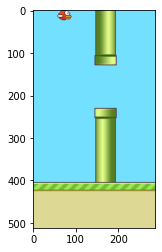

In [ ]:
# Actual Algorithm Goes here:
env, s_t = init_flappybird()
model = build_model()
D = deque()
epsilon = 0.1


vstack = np.vstack
argmax = np.argmax
append = lambda x, y: np.append(x, y, axis=3)


while (True):
    if random.random() <= epsilon: a_t = random.randint(0, 1)
    else: a_t = argmax(model.predict(s_t))
    epsilon -= 3.33e-08
    x_t1, r_t, done = env.step(a_t)
    s_t1 = append(x_t1, s_t[:, :, :, :3])
    D.append((s_t, a_t, r_t, s_t1, done))
    if len(D) > BATCH:
        X, y = [], []
        for i in range(BATCH):
            state_t, action_t, reward_t, state_t1, done = random.choice(D)
            X.append(state_t)
            y.append(model.predict(state_t)[0])
            if not done: y[-1][action_t] = reward_t + GAMMA * np.max(model.predict(state_t1))
            else: y[-1][action_t] = reward_t
        model.fit(vstack(X), vstack(y), epochs=1)
    s_t = s_t1